<a href="https://colab.research.google.com/github/NguyenTanTan/Bai-tap-python/blob/python/%C4%90%E1%BB%93_%C3%A1n_ph%C3%A2n_t%C3%ADch_th%E1%BB%91ng_k%C3%AA_suy_di%E1%BB%85n_ANOVA_m%E1%BB%99t_y%E1%BA%BFu_t%E1%BB%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHÂN TÍCH THỐNG KÊ SUY DIỄN

Thực hiện các phân tích thống kê suy diễn với tập dữ liệu Diet_R.csv: Dữ liệu về chế độ giảm cân, được thu thập với 78 đối tượng, theo các yếu tố sau:
* Giới tính: gender
* Tuổi : Age
* Chiều cao: Height
* Cân nặng trước khi giảm cân: pre.weight
* Kiểu ăn kiêng: Diet
* Cân nặng sau 6 tuần: weight6weeks


In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [47]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as st


In [10]:
df=pd.read_csv('/content/drive/MyDrive/Dữ liệu/Diet_R.csv')

In [11]:
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,NaN,41,171,60,2,60.0
1,26,NaN,32,174,103,2,103.0
2,1,0.0,22,159,58,1,54.2
3,2,0.0,46,192,60,1,54.0
4,3,0.0,55,170,64,1,63.3


# Xóa cột person


In [12]:
del df['Person']

In [13]:
df

,gender,Age,Height,pre.weight,Diet,weight6weeks
0,NaN,41,171,60,2,60.0
1,NaN,32,174,103,2,103.0
2,0.0,22,159,58,1,54.2
3,0.0,46,192,60,1,54.0
4,0.0,55,170,64,1,63.3
...,...,...,...,...,...,...
73,1.0,35,183,83,3,80.2
74,1.0,49,177,84,3,79.9
75,1.0,28,164,85,3,79.7
76,1.0,40,167,87,3,77.8


# Thêm cột weightlost

In [14]:
df['weightlost']=df['pre.weight']-df['weight6weeks']


In [15]:
df

,gender,Age,Height,pre.weight,Diet,weight6weeks,weightlost
0,NaN,41,171,60,2,60.0,0.0
1,NaN,32,174,103,2,103.0,0.0
2,0.0,22,159,58,1,54.2,3.8
3,0.0,46,192,60,1,54.0,6.0
4,0.0,55,170,64,1,63.3,0.7
...,...,...,...,...,...,...,...
73,1.0,35,183,83,3,80.2,2.8
74,1.0,49,177,84,3,79.9,4.1
75,1.0,28,164,85,3,79.7,5.3
76,1.0,40,167,87,3,77.8,9.2


# Phân loại cột weightlost theo các phương thức giảm cân

In [16]:
weightlostdiet1=df['weightlost'][df['Diet']==1]
weightlostdiet2=df['weightlost'][df['Diet']==2]
weightlostdiet3=df['weightlost'][df['Diet']==3]

# Phân tích thống kê suy diễn

# DIET

**Bài toán 1:**

Những người đang thực hiện chế độ giảm cân, họ cho rằng có sự khác biệt về hiệu quả của ba phương pháp phổ biến. Một cuộc khảo sát được thiện để kiểm tra hiệu quả. Với mức ý nghĩa 0.05 kiểm kịnh xem có sự khác biệt nào về hiệu quả giảm cân của ba phương pháp nhau hay không.

Vì có ba mẫu được lấy và kiểm định về trung bình cân nặng giảm được do đó sử dụng phân tích ANOVA một yếu tố để tiến hành kiểm định.

Phân tích ANOVA chấp nhận các giả định sau:

(1) Tất cả các nhóm đều độc lập với nhau

(2) Dữ liệu của mỗi nhóm đều tuân theo phân phối chuẩn. Tính chất này có thể được kiểm định bằng phương pháp Shapiro-Wilks.

(3) Phương sai (variance) của các nhóm bằng nhau. Tính chất này có thể được kiểm định bằng phương pháp kiểm định Bartlett hay Levene.

Nếu dữ liệu hiện có thỏa mãn các tính chất trên thì chúng ta mới tiến hành kiểm định ANOVA. Do vậy trước khi tiến hành kiểm định ANOVA, chúng ta cần thực hiện kiểm tra tập dữ liệu cần thỏa mãn 3 tính chất trên.
    

**Kiểm đinh phương sai**

Với mức ý nghĩa 0.05 kiểm định các mẫu có cùng phương sai với nhau không.
* Giả thuyết không: Các mẫu có cùng phương sai
  * $H_0: σ_1^2=σ_2^2=σ_3^2$ 
* Giả thuyết thay thế: Tồn tại ít nhất một cặp mẫu không cùng phương sai
  * $H_a: σ_i^2\neqσ_j^2$ ;

    $i \neq j$

Sử dụng hàm levene để kiểm định

In [17]:
_,p=st.levene(weightlostdiet1,weightlostdiet2,weightlostdiet3)
print('P-value: ',p)


P-value:  0.5376731304274011


Tạo hàm kết luận

In [18]:
def conclude(a,p): # a: mức ý nghĩa; p: Giá trị P (p-value)
  if p>a:
    print('Không có bằng chứng thống kê để bác bỏ giả thuyết không')
  else:
    print('Có bằng chứng thống kê để bác bỏ giả thuyết không')

In [19]:
conclude(0.05,p)

Không có bằng chứng thống kê để bác bỏ giả thuyết không


Như vậy ba mẫu có cùng phương sai

 **Kiểm định phân phối chuẩn**

Với mức ý nghĩa 0.05 kiểm định các mẫu có tuân thoe phân phối chuẩn không

* Giả thuyết không: Mẫu có tuân theo phân phôi chuẩn

* Giả thuyết thay thế: Mẫu không tuân theo phân phối chuẩn


Sử dụng hàm shapiro để kiểm định phân phối chuẩn

Tạo hàm kiểm định phân phối chuẩn

In [20]:
def test_norm(samp,a): #samp: mẫu để kiểm tra tính phân phối chuẩn; a: mức ý nghĩa
  _,p=st.shapiro(samp)
  print("P-value: ",p)
  conclude(a,p)

Kiểm định với mẫu 1

In [21]:
test_norm(weightlostdiet1,0.05)

P-value:  0.07748671621084213
Không có bằng chứng thống kê để bác bỏ giả thuyết không


Vậy mẫu một tuân theo phân phối chuẩn

Kiểm định với mẫu 2

In [22]:
test_norm(weightlostdiet2,0.05)

P-value:  0.961176335811615
Không có bằng chứng thống kê để bác bỏ giả thuyết không


Vậy mẫu hai tuân theo phân phối chuẩn

Kiểm định với mẫu 3

In [23]:
test_norm(weightlostdiet3,0.05)

P-value:  0.37203603982925415
Không có bằng chứng thống kê để bác bỏ giả thuyết không


Vậy mẫu ba tuân theo phân phối chuẩn

Như vậy, các mẫu đã đủ điều kiện kiểm định ANOVA một yếu tố.

***Kiểm đinh ANOVA một yếu tố***

* Giả thuyết không: Các phương pháp giảm cân có hiệu quả giống nhau

  $H_0:  \bar x_1=\bar x_2=\bar x_3$
* Giả thuyết thay thế: Có tồn tại ít nhất một phương pháp giảm cân không có hiểu quả như những phương pháp còn lại

  $H_α: \bar x_i\neq\bar x_j$
  
  $i\neq j $

In [24]:
_,p=st.f_oneway(weightlostdiet1,weightlostdiet2,weightlostdiet3)
print(p)
conclude(0.05,p)

0.0032290142385893524
Có bằng chứng thống kê để bác bỏ giả thuyết không


Các phương pháp giảm cân không có hiệu quả giống nhau, dựa vào sự mô tả sau để có thể lựa chọn phương pháp phù hợp.

In [25]:
print('Trung bình cân nặng giảm được của phương pháp một: ',weightlostdiet1.mean())
print('Trung bình cân nặng giảm được của phương pháp hai: ',weightlostdiet2.mean())
print('Trung bình cân nặng giảm được của phương pháp ba: ',weightlostdiet3.mean())

Trung bình cân nặng giảm được của phương pháp một:  3.2999999999999994
Trung bình cân nặng giảm được của phương pháp hai:  3.025925925925926
Trung bình cân nặng giảm được của phương pháp ba:  5.148148148148147


Biểu đồ mô tả số cân nặng được giảm của ba phương pháp

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

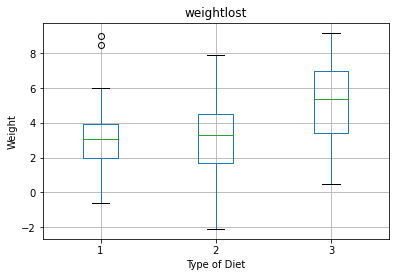

In [26]:
ax=df.boxplot(by='Diet',column='weightlost')
ax.set_xlabel('Type of Diet')
ax.set_ylabel('Weight')
plt.suptitle('')

# Age

**Bài toán 2:**

Có ý kiến cho rằng, những người muốn giảm cân thường là những người có độ tuổi dưới 45. Với mức ý nghĩa 0.05 kiểm định độ tuổi trung bình thực hiện giảm cân có phải là bé hơn 45 hay không. Mẫu được lấy có đủ điều kiện để tiến hành kiểm định.

* Giả thuyết không: Độ tuổi trung bình muốn giảm cân là 45

  $H_0: \bar x=45$
* Giả thuyết thay thế: Độ tuổi trung bình muốn giảm cân bé hơn 45

  $H_a: \bar x <45$

Với mẫu được lấy là 78 và kiểm định trung bình do vậy sử dụng ztest để kiểm định

In [63]:
a=0.05
_,p=st.ztest(df['Age'],value=45,alternative='smaller')
print('P-value',p)

P-value 7.188909477004709e-08


In [64]:
conclude(0.05,p)

Có bằng chứng thống kê để bác bỏ giả thuyết không


Như vậy có bằng chứng thông kê để nói rằng độ tuổi trung bình muốn giảm cần là bé hơn 45.

**Bài toán 3:** 

Có ý kiến cho rằng trước khi thực hiện giảm cân, nam và nữ có cân nặng trung bình bằng nhau. Với mức ý nghĩa 0.05 kiểm định xem giữa hai nhóm có sự khác nhau về cân nặng trung bình không.

* Giả thuyết không: Cân nặng trung bình trước khi giảm cân của nam và nữ bằng nhau.

  $H_0: \bar x _1=\bar x_2$
* Giả thuyết thay thế: Cân nặng trung bình trước khi giảm cân của nam và nữ không bằng nhau

  $H_a: \bar x_1\neq\bar x_2$

Xóa dữ liệu trống cột gender

In [98]:
df2=df.dropna()

In [103]:
df2.head(3)

,gender,Age,Height,pre.weight,Diet,weight6weeks,weightlost
2,0.0,22,159,58,1,54.2,3.8
3,0.0,46,192,60,1,54.0,6.0
4,0.0,55,170,64,1,63.3,0.7


Kiểm định

In [108]:
male_weight=df2['pre.weight'][df['gender']==1]   # Cân nặng của nam trước khi giảm cân
female_weight=df2['pre.weight'][df['gender']==0] # Cân nặng của nữ trước khi giảm cân

In [116]:
_,p=st.ztest(male_weight,female_weight,alternative='two-sided')
print('P-value: ',p)

P-value:  6.6138185887764725e-22


In [117]:
conclude(0.05,p)

Có bằng chứng thống kê để bác bỏ giả thuyết không


Như vậy cân nặng của nam và nữ trước khi thực hiện giảm cân là không bằng nhau